In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

from sklearn.linear_model import SGDRegressor

# Chi-square test for categorical vs target
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency #scientific python

In [3]:
#Reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#size of the train data
#keep a copy of train
train_copy = train.copy()
test_copy = test.copy()
train.shape

(1460, 81)

In [5]:
#size of test data
test.shape

(1459, 80)

In [7]:
for col in train.columns:
  print(col, train[col].isna().sum())


Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [8]:
train['LotFrontage'].value_counts()

,count
LotFrontage,
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
...,...
182.0,1
160.0,1
152.0,1


In [9]:
train.loc[train['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [10]:
for col in test.columns:
  print(col, test[col].isna().sum())

Id 0
MSSubClass 0
MSZoning 4
LotFrontage 227
LotArea 0
Street 0
Alley 1352
LotShape 0
LandContour 0
Utilities 2
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 1
Exterior2nd 1
MasVnrType 894
MasVnrArea 15
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 2
BsmtHalfBath 2
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 1
TotRmsAbvGrd 0
Functional 2
Fireplaces 0
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1456
Fence 1169
MiscFeature 1408
MiscVal 0
MoSold 0
Yr

In [11]:
# ty find median
test['Exterior1st'].mode()[0]
test['Exterior2nd'].mode()[0]


'VinylSd'

<Axes: xlabel='SalePrice', ylabel='Count'>

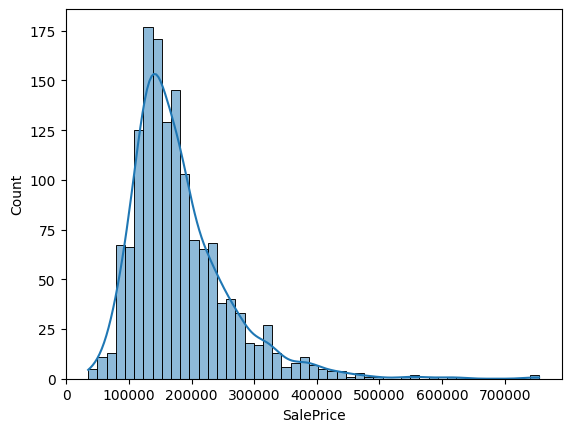

In [12]:
sns.histplot(train['SalePrice'],kde = True)
# Right skewed so mean is more than a medial, oulier lies right

In [13]:

#convert MSSubClass column into categorical - done
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF - taking only  TotalBsmtSF - done
#1stFlrSF, 2ndFlrSF, LowQualFinSF, - sum of all the three gives - GrLivArea - done
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2 - If any one of them is NA - no Basement then TotalBsmtSF must be 0

# BedroomAbvGr, KitchenAbvGr - must be included in the TotRmsAbvGrd - calculation not matching for this
#basement bath/half and bath/half - not included in the baove calculation
# BsmtFullBath + BsmtHalfBath(0.5) - not done
# FullBath + HalfBath(0.5) - not done
# #YearBuilt - to be calclulated - done
#YearRemodAdd - to be calculated - done


In [14]:
train["BsmtHalfBath"].unique()


array([0, 1, 2])

In [15]:
train["HalfBath"].unique()


array([1, 0, 2])

In [16]:
train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [17]:
num_cols = train.select_dtypes(include = np.number).columns.tolist()
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<Axes: ylabel='LotFrontage'>

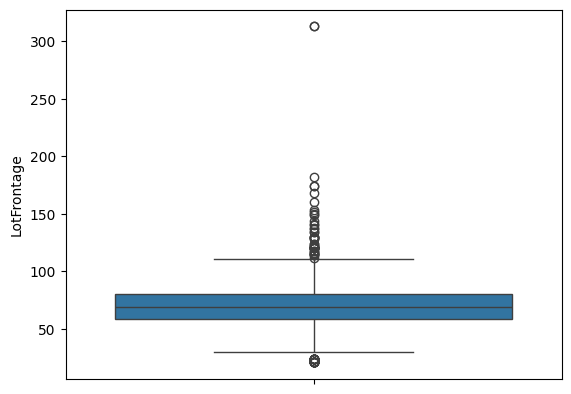

In [18]:
sns.boxplot(train['LotFrontage'])

<Axes: ylabel='LotArea'>

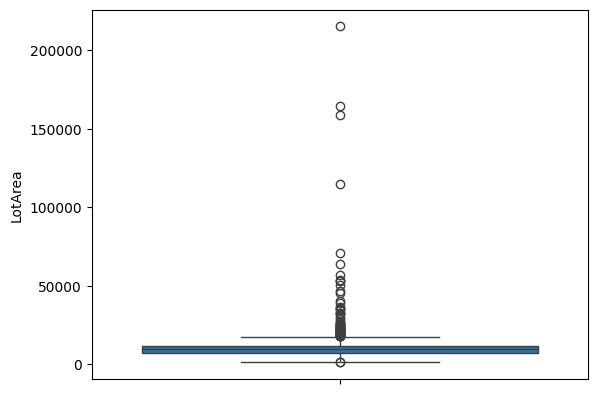

In [19]:
sns.boxplot(train['LotArea'])

<Axes: ylabel='BsmtFinSF1'>

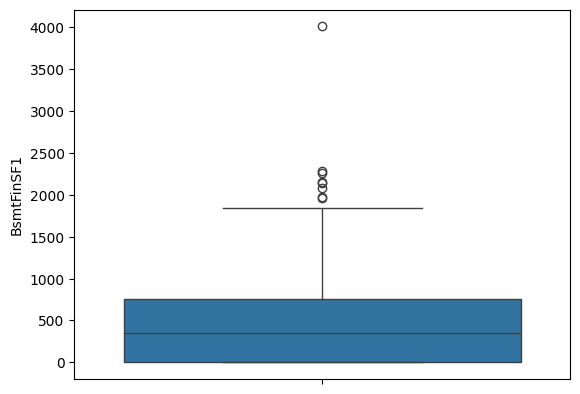

In [20]:
sns.boxplot(test['BsmtFinSF1'])

<Axes: ylabel='OverallCond'>

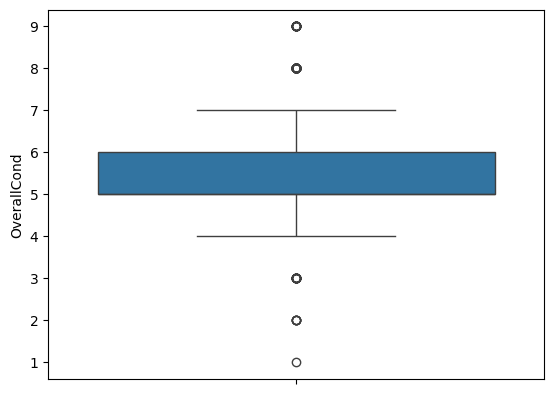

In [21]:

sns.boxplot(train['OverallCond'])

<Axes: ylabel='MasVnrArea'>

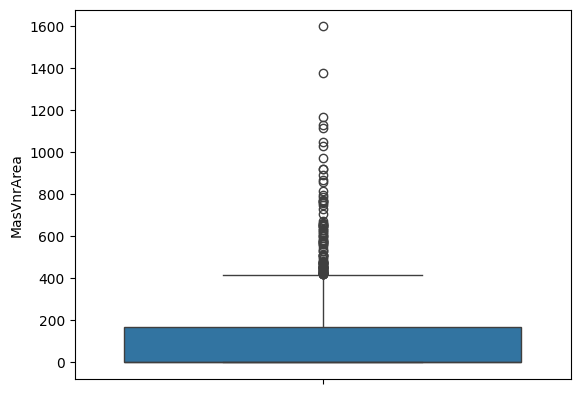

In [22]:
sns.boxplot(train['MasVnrArea'])

<Axes: ylabel='TotalBsmtSF'>

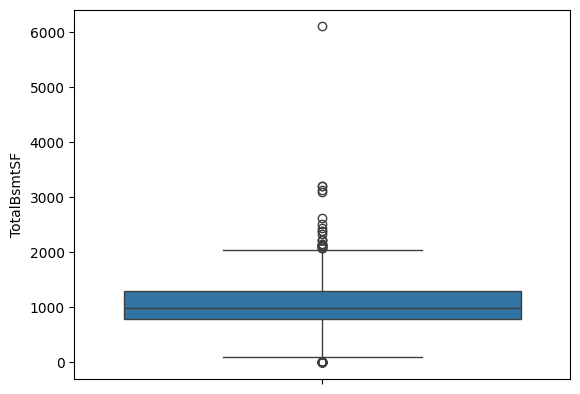

In [23]:
sns.boxplot(train['TotalBsmtSF'])

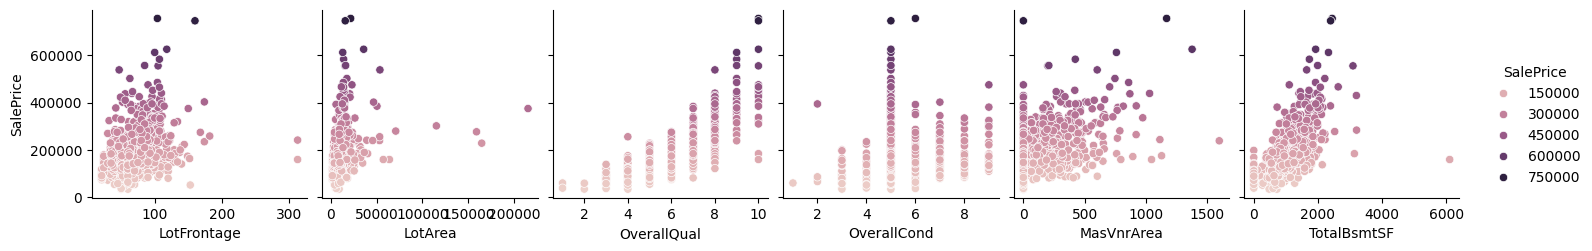

In [24]:

sns.pairplot(data=train,x_vars=["LotFrontage", "LotArea", "OverallQual", "OverallCond", "MasVnrArea", "TotalBsmtSF"], y_vars="SalePrice", hue="SalePrice")



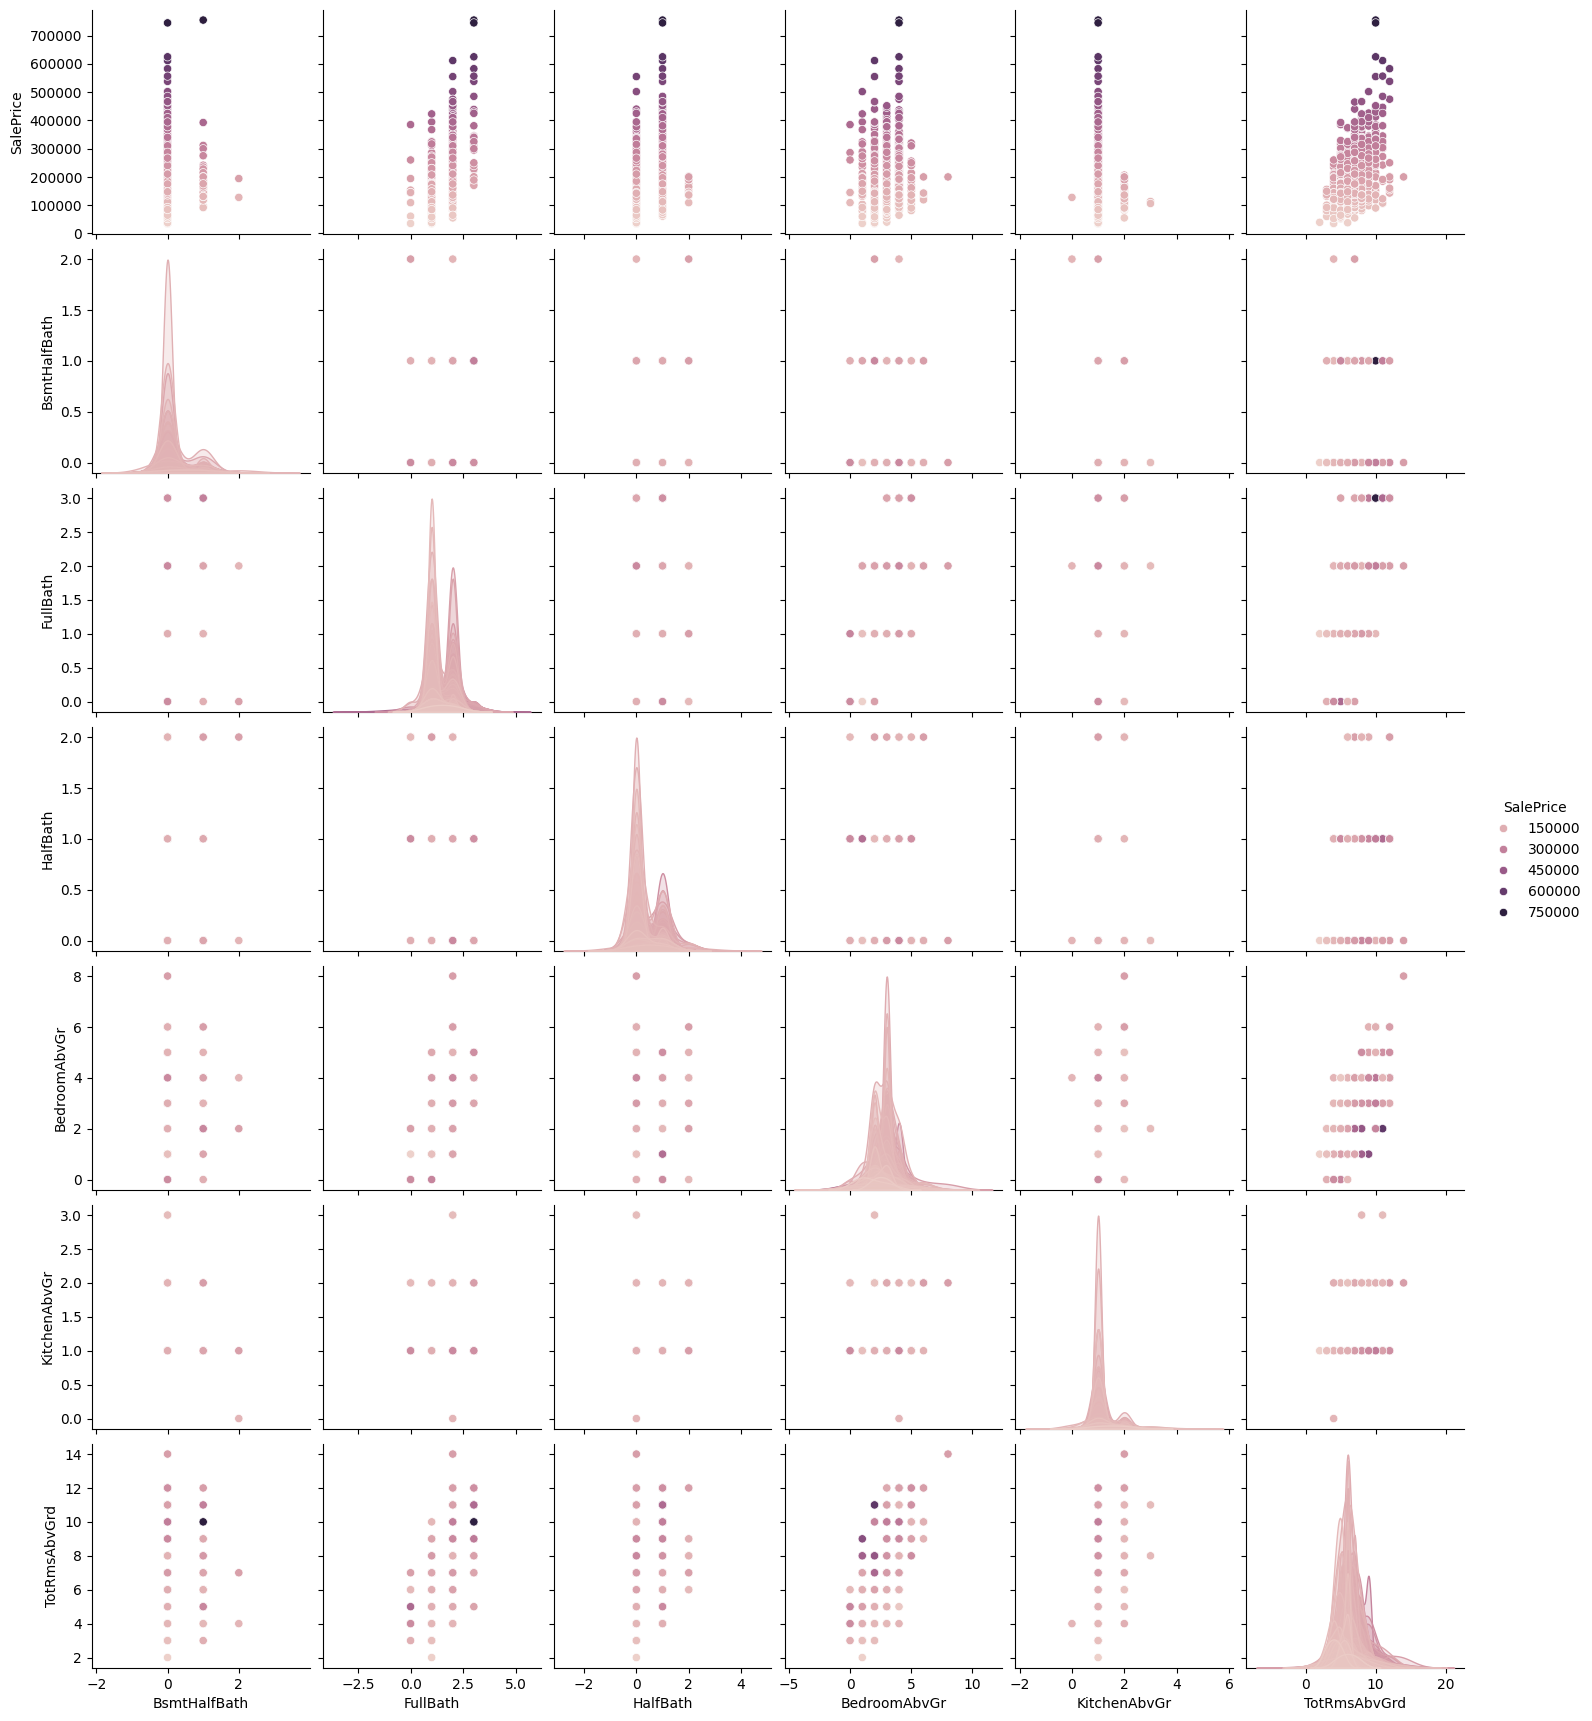

In [25]:
sns.pairplot(data=train,x_vars=['BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'], y_vars=["SalePrice",'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'], hue="SalePrice")

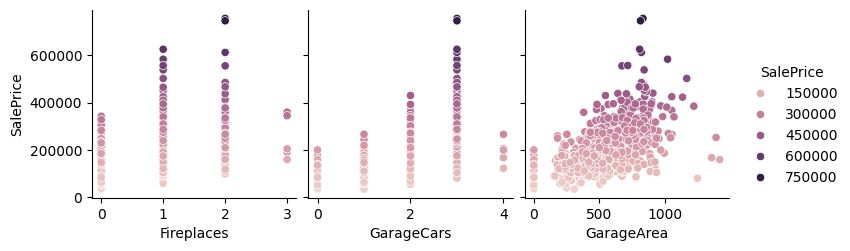

In [26]:
sns.pairplot(data=train,x_vars=['Fireplaces','GarageCars', 'GarageArea'], y_vars=["SalePrice"], hue="SalePrice")

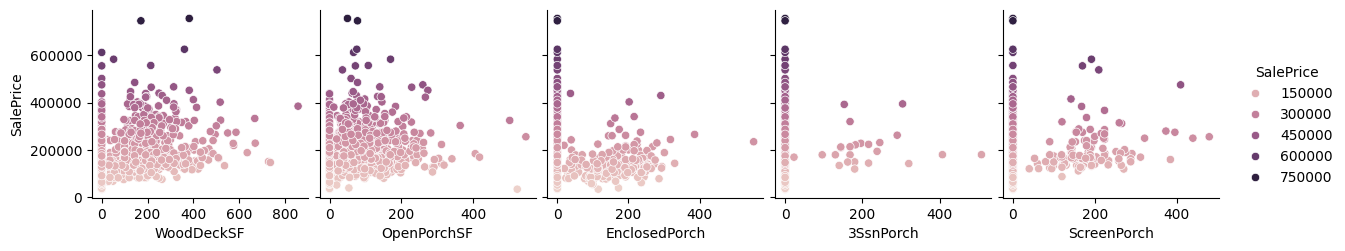

In [27]:
sns.pairplot(data=train,x_vars=['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], y_vars=["SalePrice"], hue="SalePrice")

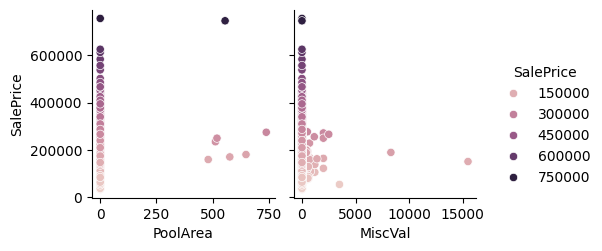

In [28]:
sns.pairplot(data=train,x_vars=['PoolArea','MiscVal'], y_vars=["SalePrice"], hue="SalePrice")

In [29]:

#LotFrontage - inversely proportional
#LotArea - not strong relationship
#OverallQual - strong relationship
#OverallCondition - high twoards means
# RoomsABvGround - some relationship
#Fire Places - contributes to sale price
# Garage cars - good relationship, when more garages also - price reduced at some point
# Garage ARea - some relation
#'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch' - no relationship
#PoolArea','MiscVal - no relationship
#Property_Age_Selling', 'Remodel_Age_Selling' - contributes to sale price
#MSSubClass- category listed in number - 150 present in test not in train

In [30]:

# filling with median for LotFrontage- next 0, df['LotFrontage'].median()
for df in [train, test]:
  df['MSSubClass_Cat'] = df['MSSubClass'].astype(str)
  df["Property_Age_Selling"] = df['YrSold']-df["YearBuilt"]
  df["Remodel_Age_Selling"] = df['YrSold']-df["YearRemodAdd"]
  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
  df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)
  df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YrSold'])
  df['Garage_Age_Selling'] = df['YrSold']-df["GarageYrBlt"]

  df['BsmtFinSF1'].fillna(0, inplace=True)
  df['BsmtFinSF2'].fillna(0, inplace=True)
  df['TotalBsmtSF'].fillna(0, inplace=True)
  df['BsmtUnfSF'].fillna(0, inplace=True)
  df['BsmtFullBath'].fillna(0, inplace=True)
  df['BsmtHalfBath'].fillna(0, inplace=True)
  df['GarageCars'].fillna(0, inplace=True)
  df['GarageArea'].fillna(0, inplace=True)







In [31]:
train['PoolQC'].isna().sum()

np.int64(1453)

In [32]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Property_Age_Selling',
 'Remodel_Age_Selling',
 'Garage_Age_Selling']

In [33]:
for col in train.columns:
  print(col, train[col].isna().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 0
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSold

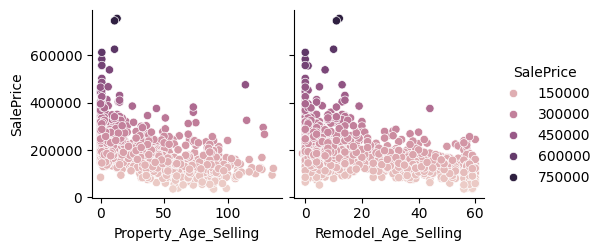

In [34]:

sns.pairplot(data=train,x_vars=['Property_Age_Selling', 'Remodel_Age_Selling'], y_vars=["SalePrice"], hue="SalePrice")

In [35]:
train[num_cols]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Property_Age_Selling,Remodel_Age_Selling,Garage_Age_Selling
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,208500,5,5,5.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,181500,31,31,31.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,223500,7,6,7.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,140000,91,36,8.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,250000,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,8,2007,175000,8,7,8.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,2,2010,210000,32,22,32.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,2500,5,2010,266500,69,4,69.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,4,2010,142125,60,14,60.0


In [36]:
train[num_cols].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Property_Age_Selling,Remodel_Age_Selling,Garage_Age_Selling
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012724,0.022049,0.004004
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.028746,-0.041968,-0.101202
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.116223,-0.082957,-0.035589
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014832,-0.014709,0.043058
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572629,-0.552570,-0.428661
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.377325,-0.070931,0.299510
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.999036,-0.593868,-0.688843
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.590360,-0.997930,-0.561849
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.311479,-0.177105,-0.204765
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.248483,-0.127556,-0.114619


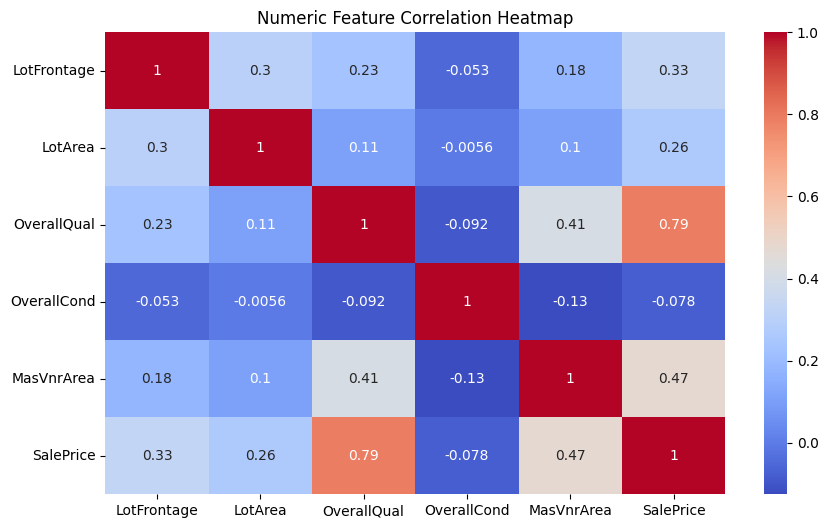

In [37]:
# Correlation heatmap (numeric features) Pearson Coefficent - for first 5except OverallCond having contributions
selected_num_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'SalePrice']
df_selected = train[selected_num_columns]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


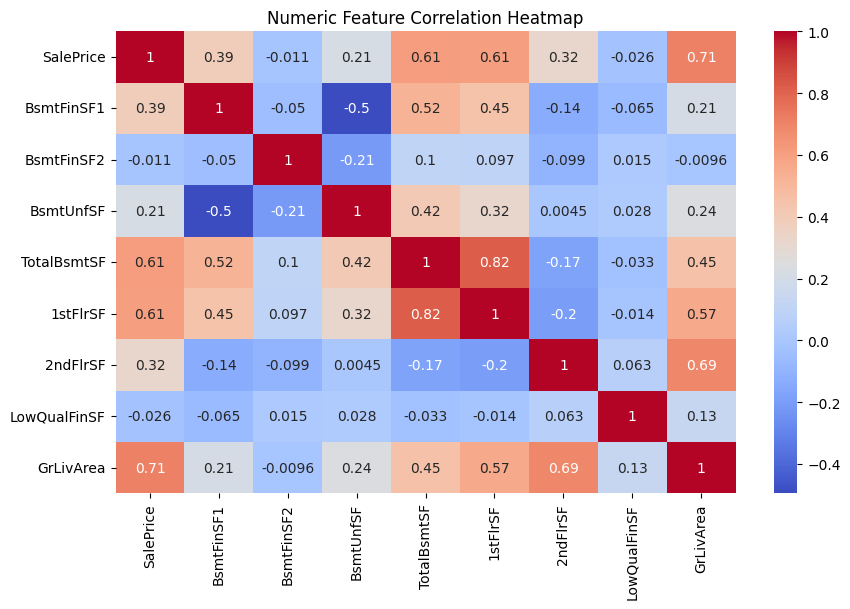

In [38]:
# Correlation heatmap (numeric features) Pearson Coefficent - for TotalBsmtSF, GrLivArea having relation
selected_num_columns2 = ['SalePrice','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
df_selected2 = train[selected_num_columns2]
correlation_matrix = df_selected2.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

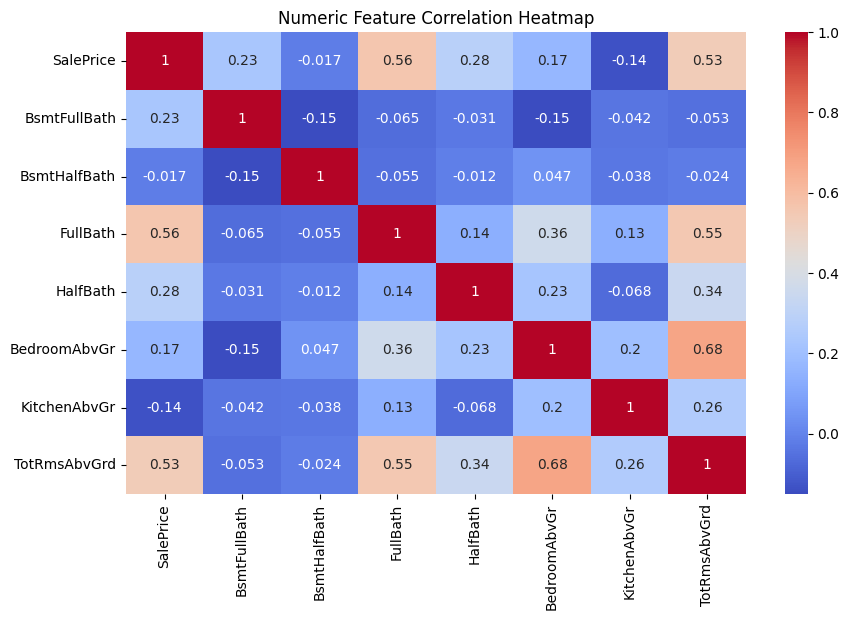

In [39]:
# Correlation heatmap (numeric features) Pearson Coefficent - BsmtFullBath FullBath HalfBath BedroomAbvGr TotRmsAbvGrd
selected_num_columns3 = ['SalePrice','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
df_selected3 = train[selected_num_columns3]
correlation_matrix = df_selected3.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

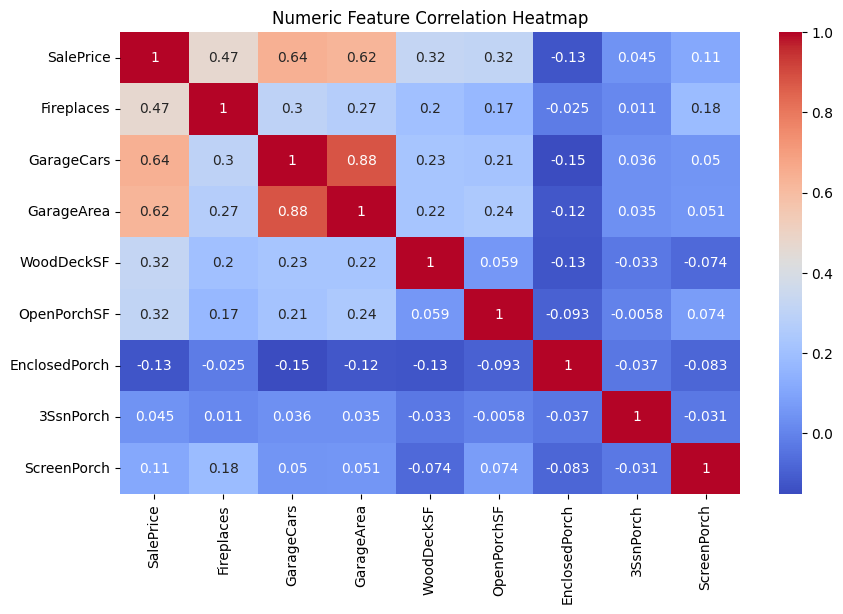

In [40]:
# Correlation heatmap (numeric features) Pearson Coefficent - BsmtFullBath FullBath HalfBath BedroomAbvGr TotRmsAbvGrd
selected_num_columns4 = ['SalePrice','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df_selected4 = train[selected_num_columns4]
correlation_matrix = df_selected4.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

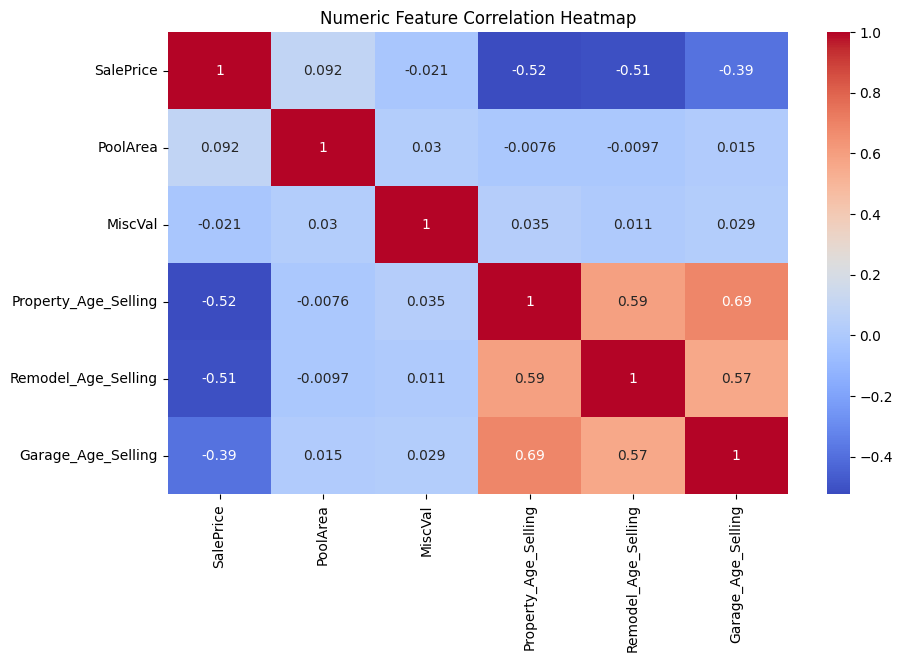

In [41]:
# Correlation heatmap (numeric features) Pearson Coefficent - 'Property_Age_Selling', 'Remodel_Age_Selling', 'Garage_Age_Selling']
selected_num_columns4 = ['SalePrice','PoolArea', 'MiscVal', 'Property_Age_Selling', 'Remodel_Age_Selling', 'Garage_Age_Selling']
df_selected4 = train[selected_num_columns4]
correlation_matrix = df_selected4.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

In [42]:
cat_cols = train.select_dtypes(exclude=np.number).columns
chi_results = []

#Chi-Square is a test for variance
for c in cat_cols:
    contingency = pd.crosstab(train[c], pd.qcut(train["SalePrice"], q=4)) #4Quartilee
    chi2_stat, p, dof, ex = chi2_contingency(contingency)
    chi_results.append((c, chi2_stat, p))
    #H0 - No association between each categorical variable and binned sales
    #HA - Strong Relationship (p<0.05) reject Null
chi_df = pd.DataFrame(chi_results, columns=["Feature","Chi2","p_value"]).sort_values("p_value")
print("Chi-Square association with House Price (lower p = stronger association):")
display(chi_df)



Chi-Square association with House Price (lower p = stronger association):


,Feature,Chi2,p_value
8,Neighborhood,1214.306130,5.542657e-207
18,ExterQual,725.401084,2.388526e-150
30,KitchenQual,722.057891,1.250527e-149
21,BsmtQual,710.778271,3.330933e-147
43,MSSubClass_Cat,656.638819,2.397197e-111
34,GarageFinish,523.240570,8.267739e-110
20,Foundation,517.647182,1.041686e-100
33,GarageType,457.125511,6.461484e-88
27,HeatingQC,360.420597,8.861934e-70
24,BsmtFinType1,330.754544,2.202050e-61


In [43]:
train[train['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_Cat,Property_Age_Selling,Remodel_Age_Selling,Garage_Age_Selling


In [44]:
target = "SalePrice"
#

features = ['LotFrontage', 'LotArea', 'OverallQual', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea','BsmtFullBath', 'BsmtHalfBath',  'TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'Property_Age_Selling', 'Remodel_Age_Selling', 'Garage_Age_Selling','Neighborhood','ExterQual','KitchenQual','BsmtQual','MSSubClass_Cat','GarageFinish','Foundation','GarageType','HeatingQC','BsmtFinType1','MSZoning','Exterior1st','Exterior2nd','HouseStyle','CentralAir','SaleCondition','LotShape','BsmtExposure','SaleType','PavedDrive','Electrical','FireplaceQu','MasVnrType','GarageQual','BldgType','Condition1','GarageCond','BsmtCond','RoofStyle','Alley','LandContour','Heating','Fence','ExterCond', 'LotConfig','Functional','RoofMatl']

X = train[features]
y = train[target]

X_test = test[features]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

In [45]:
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'Property_Age_Selling', 'Remodel_Age_Selling',
       'Garage_Age_Selling'],
      dtype='object')

In [46]:
cat_cols

Index(['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'MSSubClass_Cat', 'GarageFinish', 'Foundation', 'GarageType',
       'HeatingQC', 'BsmtFinType1', 'MSZoning', 'Exterior1st', 'Exterior2nd',
       'HouseStyle', 'CentralAir', 'SaleCondition', 'LotShape', 'BsmtExposure',
       'SaleType', 'PavedDrive', 'Electrical', 'FireplaceQu', 'MasVnrType',
       'GarageQual', 'BldgType', 'Condition1', 'GarageCond', 'BsmtCond',
       'RoofStyle', 'Alley', 'LandContour', 'Heating', 'Fence', 'ExterCond',
       'LotConfig', 'Functional', 'RoofMatl'],
      dtype='object')

In [47]:
preprocessor = ColumnTransformer([("num",StandardScaler(),num_cols),
                                  ("categorical", OneHotEncoder(handle_unknown="ignore", drop='first',sparse_output=False),cat_cols)])
lin_pipe = Pipeline([('prep',preprocessor),
                     ('model',LinearRegression())]) #Solves

In [48]:
lin_pipe.fit(X,y) #Gradient descent is happening here..!
y_pred = lin_pipe.predict(X)

In [49]:
r2 = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [50]:
r2

0.9190408509893953

In [51]:
rmse

np.float64(22596.28812127503)

In [52]:
preds = lin_pipe.predict(X_test)

preds = np.clip(preds,0,None)

submission = pd.DataFrame({'Id':test['Id'],
                           'SalePrice':preds
                           })

submission.to_csv("Submission_HousePrediction_LR.csv",index=False)

In [53]:
preprocessor = ColumnTransformer([("num",StandardScaler(),num_cols),
                                  ("categorical", OneHotEncoder(handle_unknown="ignore", drop='first',sparse_output=False),cat_cols)])
sgd_pipe = Pipeline([('prep',preprocessor),
                     ('model',SGDRegressor(loss='squared_error',
                                           max_iter=1000))]) #Learns

In [54]:
sgd_pipe.fit(X,y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Enclosed...
       'HeatingQC', 'BsmtFinType1', 'MSZoning', 'Exterior1st', 'Exterior2nd',
       'HouseStyle', 'CentralAir', 'SaleCondition', 'LotShape', 'BsmtExposure',
       'SaleType', 'PavedDrive', 'Electrical', 'FireplaceQu', 'MasVnrType',
       'GarageQual', 'BldgType', 'Condition1', 'GarageCond', 'BsmtCond',
       'RoofStyle', 'Alley', 'LandContour', 'Heating', 'Fence', 'ExterCond',
       'LotConfig', 'Functional', 'RoofMatl'],
      dtype='object'))])),
                ('model', SGDRegressor())])

In [55]:
rmse = np.sqrt(mean_squared_error(y,sgd_pipe.predict(X)))
r2 = r2_score(y,sgd_pipe.predict(X))

In [56]:
rmse

np.float64(27462.218623173652)

In [57]:
r2

0.88041878342665

In [58]:
preds = sgd_pipe.predict(X_test)

preds = np.clip(preds,0,None)

submission = pd.DataFrame({'Id':test['Id'],
                           'SalePrice':preds
                           })

submission.to_csv("Submission_HousePrediction_SGD.csv",index=False)

In [1]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
preprocessor = ColumnTransformer([("num",StandardScaler(),num_cols),
                                  ("categorical", OneHotEncoder(handle_unknown="ignore", drop='first',sparse_output=False),cat_cols)])

pipe_full = Pipeline([
    ('preproc', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])




NameError: name 'ColumnTransformer' is not defined

In [64]:
pipe_full.fit(X, y)
# y_pred = pipe_full.predict(X)
# r2 = r2_score(y,y_pred)
# rmse = np.sqrt(mean_squared_error(y,y_pred))

# print("Polynomial Deg 2 LR: R2 ---", r2)
# print("Polynomial Deg 2 LR: RMSE ---", rmse)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Enclo...
       'HouseStyle', 'CentralAir', 'SaleCondition', 'LotShape', 'BsmtExposure',
       'SaleType', 'PavedDrive', 'Electrical', 'FireplaceQu', 'MasVnrType',
       'GarageQual', 'BldgType', 'Condition1', 'GarageCond', 'BsmtCond',
       'RoofStyle', 'Alley', 'LandContour', 'Heating', 'Fence', 'ExterCond',
       'LotConfig', 'Functional', 'RoofMatl'],
      dtype='object'))])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [65]:
y_pred = pipe_full.predict(X)

In [68]:
r2 = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y,y_pred))

In [70]:
r2

0.9999969455613789

In [72]:
rmse

np.float64(138.793726912051)

In [74]:
preds = pipe_full.predict(X_test)

preds = np.clip(preds,0,None)

submission = pd.DataFrame({'Id':test['Id'],
                           'SalePrice':preds
                           })

submission.to_csv("PolynomialLR_Degree2_HousePrediction.csv",index=False)